![the flag](flag_pic.png)

In [77]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

#Print number of countries by landmass, or continent
num_per_contintent = df.groupby("landmass").size()
continent_map = {1: 'N. America', 2: 'S. America', 3: 'Europe', 4: 'Africa', 5: 'Asia', 6: 'Oceania'}

print(num_per_contintent.rename(index=continent_map))

#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df['landmass'].isin([3, 6])]
print(df_36.groupby("landmass").size())

#Create labels for only Europe and Oceania
labels = (df["landmass"].isin([3,6])) * 1

#Print the variable types for the predictors
print(labels.dtypes)
print(df[var].dtypes)

#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var], columns=['mainhue']) * 1
print(data.head())

landmass
N. America    31
S. America    17
Europe        35
Africa        52
Asia          39
Oceania       20
dtype: int64
landmass
3    35
6    20
dtype: int64
int32
red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object
    red  green  blue  gold  white  black  orange  bars  stripes  circles  ...  \
1     1      0     0     1      0      1       0     0        0        0  ...   
3     1      0     1     1      1      0       1     0        0        0  ...   
4     1      0     1     1      0      0       0     3        0        0  ...   
10    1      0     1     0      1      0       0     0        0        0  ...   
11    1      0     0     0      1      0       0     0        3        0  ...   

    quar

[0.8571428571428571, 0.9285714285714286, 0.9285714285714286, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.9285714285714286, 0.8571428571428571]


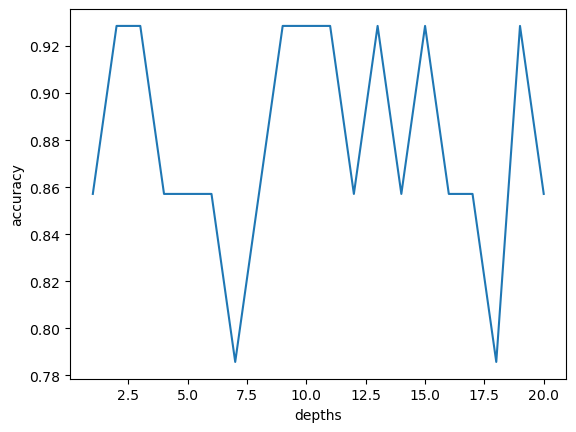

Maximum accuracy: 0.9285714285714286 at depth: 2


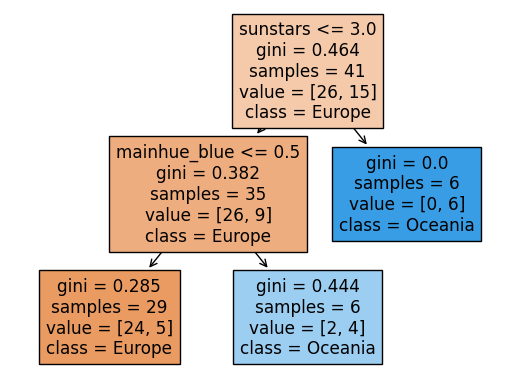

In [79]:
#Split data into a train and test set
X_train, X_val, y_train, y_val = train_test_split(data, df_36["landmass"], random_state = 50)

#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []

classifier = DecisionTreeClassifier()

for i in depths:
  classifier.fit(X_train, y_train)
  acc_depth.append(classifier.score(X_val, y_val))
print(acc_depth)

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel("depths")
plt.ylabel("accuracy")
plt.show()

#Find the largest accuracy and the depth this occurs

max_accuracy = np.max(acc_depth)
best_depth_index = acc_depth.index(max_accuracy)
best_depth = depths[best_depth_index]
print(f"Maximum accuracy: {max_accuracy} at depth: {best_depth}")

#Refit decision tree model with the highest accuracy and plot the decision tree
classifier = DecisionTreeClassifier(max_depth=best_depth)
classifier.fit(X_train, y_train)

tree.plot_tree(classifier, feature_names = X_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)     
plt.savefig("tree_plot.png", dpi=300)
plt.savefig("tree_plot.pdf")    
plt.show()

#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list


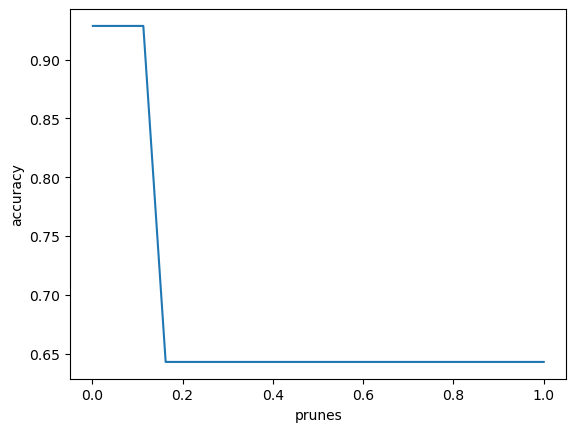

In [81]:
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 50, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(X_train, y_train)
    acc_pruned.append(dt_prune.score(X_val, y_val))

#Plot the accuracy vs ccp_alpha

plt.plot(ccp, acc_pruned)
plt.xlabel("prunes")
plt.ylabel("accuracy")
plt.show()

#Find the largest accuracy and the ccp value this occurs
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
#Plot the final decision tree

1.0
The best accuracy is 1.0 which is prune 0.6428571428571429


[Text(0.5, 0.5, 'gini = 0.464\nsamples = 41\nvalue = [26, 15]\nclass = Europe')]

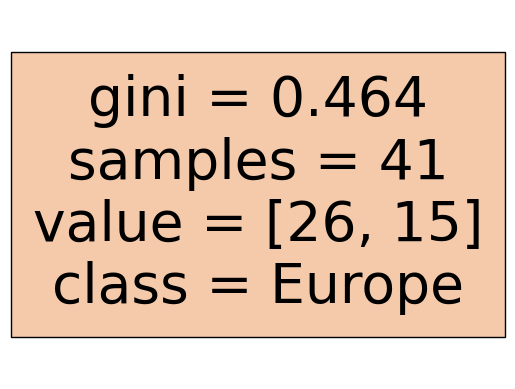

In [72]:
max_pruned_acc = np.max(ccp)
print(max_pruned_acc)
that_index = ccp.argmax()
best_prune = acc_pruned[that_index] 
print(f"The best accuracy is {max_pruned_acc} which is prune {best_prune}")

#Fit a decision tree model with the values for max_depth and ccp_alpha found above
classifier = DecisionTreeClassifier(max_depth=best_depth, ccp_alpha = best_prune)
classifier.fit(X_train, y_train)

tree.plot_tree(classifier, feature_names = X_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)

As a model, this is obviously overfitting, but this is what the 